# Process Bursts

This notebook computes the burst drift for all bursts using the method show in `BurstDrift.ipynb`

In [13]:
#!/usr/bin/python3

from __future__ import division
import math
import os
import sys
import time
import numpy as np
import scipy.stats
from scipy.optimize import curve_fit
from math import log10
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy import pi as nombrepi
from scipy import signal, ndimage
from tqdm import tqdm
from matplotlib import colors as mcolors
import functools
print = functools.partial(print, flush=True) # print doesn't happen til script ends so force it to flush... windows thing?
import pandas as pd
import corrfns

bursts = pd.read_csv('bursts.csv')

# Gaussian 2d Fit Stuff
# Source: https://gist.github.com/andrewgiessel/6122739
# Source: https://stackoverflow.com/questions/21566379/fitting-a-2d-gaussian-function-using-scipy-optimize-curve-fit-valueerror-and-m
def gaussian(height, center_x, center_y, width_x, width_y, rotation):
    """Returns a gaussian function with the given parameters"""
    width_x = float(width_x)
    width_y = float(width_y)

    rotation = np.deg2rad(rotation)
    center_x_old = center_x
    center_x = center_x * np.cos(rotation) - center_y * np.sin(rotation)
    center_y = center_x_old * np.sin(rotation) + center_y * np.cos(rotation)

    def rotgauss(x,y):
        xp = x * np.cos(rotation) - y * np.sin(rotation)
        yp = x * np.sin(rotation) + y * np.cos(rotation)
        g = height*np.exp( -(((center_x-xp)/width_x)**2  +((center_y-yp)/width_y)**2)/2.  )
        return g
    return rotgauss

def moments(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution by calculating its
    moments """
    total = data.sum()
    X, Y = np.indices(data.shape)
    x = (X*data).sum()/total
    y = (Y*data).sum()/total
    col = data[:, int(y)]
    width_x = np.sqrt(abs((np.arange(col.size)-y)**2*col).sum()/col.sum())
    row = data[int(x), :]
    width_y = np.sqrt(abs((np.arange(row.size)-x)**2*row).sum()/row.sum())
    height = data.max()
    return height, x, y, width_x, width_y, 2.0

def twoD_Gaussian(point, amplitude, xo, yo, sigma_x, sigma_y, theta):
    x, y = point
    xo = float(xo)
    yo = float(yo)
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = (np.sin(2*theta))/(2*sigma_x**2) - (np.sin(2*theta))/(2*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    g = amplitude*np.exp( - a*((x-xo)**2) - b*(x-xo)*(y-yo) - c*((y-yo)**2))
    return g.ravel()

def fitgaussian(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution found by a fit"""
    params = moments(data)
    errorfunction = lambda p: np.ravel(gaussian(*p)(*np.indices(data.shape)) - data)
    p, success = scipy.optimize.leastsq(errorfunction, params)
    return p, success

def fitgaussiannlsq(data):
    # use curve-fit (non-linear leastsq)
    x = range(0, 1023); y = range(0, 1023)
    x, y = np.meshgrid(x, y)
    params = moments(data)#+ (0.,)
    popt, pcov = scipy.optimize.curve_fit(twoD_Gaussian, (x, y), corr.ravel(), p0=params)
    return popt, pcov







  0%|          | 0/24 [00:00<?, ?it/s]

processing 01_puppi_57747_C0531+33_0558_5.dm559.72.calibP.RM.DD.ASCII
Data loaded
finding auto-correlation...
finding fit...
solution nlsq: [1.81678443e+03 5.12499356e+02 5.12485033e+02 1.73991316e+02
 4.70716219e+01 1.71656458e+00]
parameter 1sigma: [3.62245794e-01 1.05608076e-02 3.43437452e-02 3.47563680e-02
 9.38124568e-03 8.22942519e-05]
solver angle: 1.716564580423581 pos angle: 1.716564580423581
drift: -1039.3594223611126
drift error: 0.5951711476889765
saved figures/burst_1_figure.png








  4%|▍         | 1/24 [00:18<07:10, 18.70s/it]

processing 02_puppi_57747_C0531+33_0558_1183.dm559.72.calibP.RM.DD.ASCII
Data loaded
finding auto-correlation...
finding fit...
solution nlsq: [ 81.49221033 512.49442558 512.47833943 177.67605803  44.62740107
   8.05717689]
parameter 1sigma: [0.0731369  0.05071685 0.15635226 0.15981121 0.04003133 0.00034019]
solver angle: 8.057176894958651 pos angle: 8.057176894958651
drift: -740.5785664874351
drift error: 1.2746759756435313
saved figures/burst_2_figure.png








  8%|▊         | 2/24 [01:12<10:45, 29.36s/it]

processing 03_puppi_57747_C0531+33_0558_1202.dm559.72.calibP.RM.DD.ASCII
Data loaded
finding auto-correlation...
finding fit...
solution nlsq: [184.1109739  512.4955582  512.35654137 170.31670446  19.22063055
   1.62478075]
parameter 1sigma: [1.14725931e-01 1.32560623e-02 1.05960571e-01 1.06295310e-01
 1.19731456e-02 1.00720985e-04]
solver angle: 1.6247807545214574 pos angle: 1.6247807545214574
drift: -2823.7704526366315
drift error: 5.278675460837572
saved figures/burst_3_figure.png








 12%|█▎        | 3/24 [01:44<10:28, 29.91s/it]

processing 04_puppi_57747_C0531+33_0558_25437.dm559.72.calibP.RM.DD.ASCII
Data loaded
finding auto-correlation...
finding fit...
solution nlsq: [  4.22636596 512.41500289 511.98557103 159.27178139 -26.21404325
   1.70804699]
parameter 1sigma: [0.08602616 0.68936919 3.2121176  3.2433282  0.53321458 0.00486595]
solver angle: 1.7080469891015035 pos angle: 1.7080469891015035
drift: -1104.7564027392195
drift error: 39.6632114680544
saved figures/burst_4_figure.png








 17%|█▋        | 4/24 [02:04<09:03, 27.17s/it]

processing 05_puppi_57747_C0531+33_0558_3683.dm559.72.calibP.RM.DD.ASCII
Data loaded
finding auto-correlation...
finding fit...
solution nlsq: [  5.53663695 512.46314844 512.82954179  37.31699208 166.62833302
   3.21372153]
parameter 1sigma: [0.0702359  0.49581737 2.10766887 0.47301205 2.11544629 0.00422736]
solver angle: 3.21372153119192 pos angle: 1.6429252043970233
drift: -2111.819665252407
drift error: 124.20070677832688
saved figures/burst_5_figure.png








 21%|██        | 5/24 [02:25<07:57, 25.11s/it]

processing 06_puppi_57747_C0531+33_0558_3687.dm559.72.calibP.RM.DD.ASCII
Data loaded
finding auto-correlation...
finding fit...
solution nlsq: [151.95285118 512.48735247 512.39464552 157.14088822  12.43800249
   1.59600775]
parameter 1sigma: [1.63826184e-01 1.40695812e-02 1.69362642e-01 1.69494483e-01
 1.34098694e-02 1.21450351e-04]
solver angle: 1.5960077484529644 pos angle: 1.5960077484529644
drift: -6051.049489932171
drift error: 29.161925098482104
saved figures/burst_6_figure.png








 25%|██▌       | 6/24 [02:48<07:21, 24.53s/it]

processing 07_puppi_57747_C0531+33_0558_3688.dm559.72.calibP.RM.DD.ASCII
Data loaded
finding auto-correlation...
finding fit...
solution nlsq: [269.70713701 512.49599945 512.48392351 102.65223685  38.82269304
   1.719295  ]
parameter 1sigma: [0.13163047 0.02015109 0.04962395 0.05009606 0.01894697 0.00030461]
solver angle: 1.719294995412541 pos angle: 1.719294995412541
drift: -1019.9729352870824
drift error: 2.1233272651488764
saved figures/burst_7_figure.png








 29%|██▉       | 7/24 [03:09<06:40, 23.54s/it]

processing 08_puppi_57747_C0531+33_0558_3689.dm559.72.calibP.RM.DD.ASCII
Data loaded
finding auto-correlation...
finding fit...
solution nlsq: [246.10956197 512.49488321 512.49278784 171.61894455  64.50591015
   1.9922359 ]
parameter 1sigma: [0.06972018 0.02595081 0.0449859  0.04864012 0.01827115 0.00017534]
solver angle: 1.9922359031427475 pos angle: 1.9922359031427475
drift: -340.36979700586693
drift error: 0.1598848701846422
saved figures/burst_8_figure.png








 33%|███▎      | 8/24 [03:27<05:48, 21.81s/it]

processing 09_puppi_57747_C0531+33_0558_3690.dm559.72.calibP.RM.DD.ASCII
Data loaded
finding auto-correlation...
finding fit...
solution nlsq: [  3.555139   512.31037108 512.36846678 133.40952837  89.61532099
   2.24302333]
parameter 1sigma: [0.05073798 1.55143134 1.68992591 1.90451195 1.27891546 0.02468622]
solver angle: 2.243023327437174 pos angle: 2.243023327437174
drift: -191.7209314284756
drift error: 9.713484592501702
saved figures/burst_9_figure.png








 38%|███▊      | 9/24 [03:45<05:09, 20.63s/it]

processing 10_puppi_57747_C0531+33_0558_12568.dm559.72.calibP.RM.DD.ASCII
Data loaded
finding auto-correlation...
finding fit...
solution nlsq: [  5.79253625 512.44504429 512.93472681 131.25658488  47.05628877
   1.75166991]
parameter 1sigma: [0.0720247  0.64583559 1.60732851 1.63053751 0.58479465 0.00723508]
solver angle: 1.7516699133977265 pos angle: 1.7516699133977265
drift: -834.3963817749953
drift error: 34.115706412136014
saved figures/burst_10_figure.png








 42%|████▏     | 10/24 [04:06<04:49, 20.67s/it]

processing 11_puppi_57748_C0531+33_0594_2.dm559.72.calibP.RM.DD.ASCII
Data loaded
finding auto-correlation...
finding fit...
solution nlsq: [ 11.93446041 512.5069783  512.32557781 182.95925463  39.53136181
   1.71771527]
parameter 1sigma: [0.0672644  0.2669257  1.02024478 1.03506002 0.22259519 0.00180582]
solver angle: 1.717715268209559 pos angle: 1.717715268209559
drift: -1031.1020979289908
drift error: 12.85776860484354
saved figures/burst_11_figure.png








 46%|████▌     | 11/24 [04:25<04:25, 20.45s/it]

processing 12_puppi_57748_C0531+33_0594_48.dm559.72.calibP.RM.DD.ASCII
Data loaded
finding auto-correlation...
finding fit...
solution nlsq: [ 82.33868275 512.49918805 512.45491872 138.59078842  28.58861845
   4.86193128]
parameter 1sigma: [0.08557052 0.03637607 0.14247221 0.14401413 0.0297075  0.00031664]
solver angle: 4.861931275488889 pos angle: 4.861931275488889
drift: -1012.748636295265
drift error: 2.176698652415079
saved figures/burst_12_figure.png








 50%|█████     | 12/24 [04:49<04:16, 21.39s/it]

processing 13_puppi_57748_C0531+33_0594_49.dm559.72.calibP.RM.DD.ASCII
Data loaded
finding auto-correlation...
finding fit...
solution nlsq: [927.14867979 512.4990735  512.46853852 141.8452995   40.4367131
   1.73595691]
parameter 1sigma: [2.58429240e-01 1.28785692e-02 3.90425901e-02 3.95382989e-02
 1.12711013e-02 1.22316465e-04]
solver angle: 1.7359569051940114 pos angle: 1.7359569051940114
drift: -915.4601585410009
drift error: 0.6904698078704201
saved figures/burst_13_figure.png








 54%|█████▍    | 13/24 [05:08<03:45, 20.52s/it]

processing 14_puppi_57748_C0531+33_0594_50.dm559.72.calibP.RM.DD.ASCII
Data loaded
finding auto-correlation...
finding fit...
solution nlsq: [327.57976007 512.49722163 512.15839301 160.73610387  11.4305252
  -1.52663369]
parameter 1sigma: [1.49260447e-01 6.12541609e-03 7.31632184e-02 7.32841540e-02
 5.20766023e-03 4.60546937e-05]
solver angle: -1.526633688844624 pos angle: -1.526633688844624
drift: -3452.8888094418326
drift error: 3.6055067417170976
saved figures/burst_14_figure.png








 58%|█████▊    | 14/24 [05:33<03:38, 21.88s/it]

processing 15_puppi_57748_C0531+33_0594_1269.dm559.72.calibP.RM.DD.ASCII
Data loaded
finding auto-correlation...
finding fit...
solution nlsq: [520.61694002 512.48452827 512.48980406  65.74027771  47.59690268
   1.99202443]
parameter 1sigma: [0.24649098 0.0241851  0.02986339 0.03112693 0.02253565 0.00101879]
solver angle: 1.9920244263623088 pos angle: 1.9920244263623088
drift: -340.56271950800624
drift error: 0.9298390196518473
saved figures/burst_15_figure.png








 62%|██████▎   | 15/24 [05:56<03:20, 22.33s/it]

processing 16_puppi_57772_C0531+33_0007_2695.dm559.72.calibP.RM.DD.ASCII
Data loaded
finding auto-correlation...
finding fit...
solution nlsq: [2.59137213e+03 5.12498935e+02 5.12490100e+02 1.25261119e+02
 4.64706804e+01 1.70492369e+00]
parameter 1sigma: [7.68786049e-01 1.45382894e-02 3.68728862e-02 3.71605986e-02
 1.37864475e-02 1.80496507e-04]
solver angle: 1.7049236939899126 pos angle: 1.7049236939899126
drift: -1130.8040119139898
drift error: 1.5401392085406373
saved figures/burst_16_figure.png








 67%|██████▋   | 16/24 [06:14<02:49, 21.16s/it]

processing gajjar/11A_16sec.calib.4p.RM.scr.ASCII
processing gajjar/11D_323sec.calib.4p.RM.scr.ASCII
processing chime_low
processing 11_puppi_57748_C0531+33_0594_2.dm559.72.calibP.RM.DD.ASCII
processing 11_puppi_57748_C0531+33_0594_2.dm559.72.calibP.RM.DD.ASCII
processing 11_puppi_57748_C0531+33_0594_2.dm559.72.calibP.RM.DD.ASCII
processing 11_puppi_57748_C0531+33_0594_2.dm559.72.calibP.RM.DD.ASCII
processing 11_puppi_57748_C0531+33_0594_2.dm559.72.calibP.RM.DD.ASCII


100%|██████████| 24/24 [06:14<00:00, 15.62s/it]


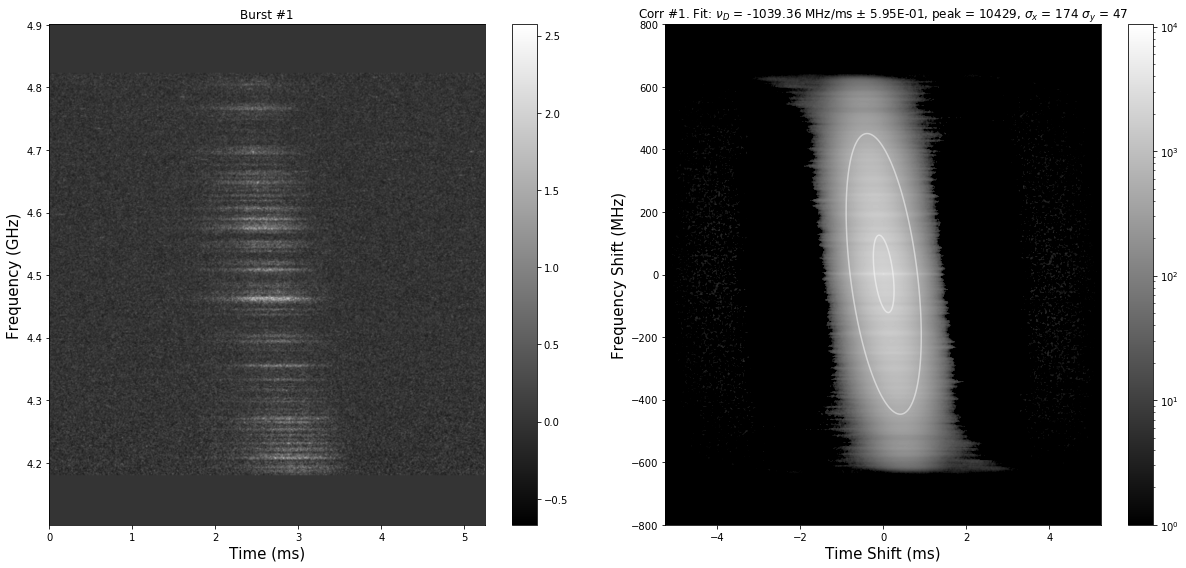

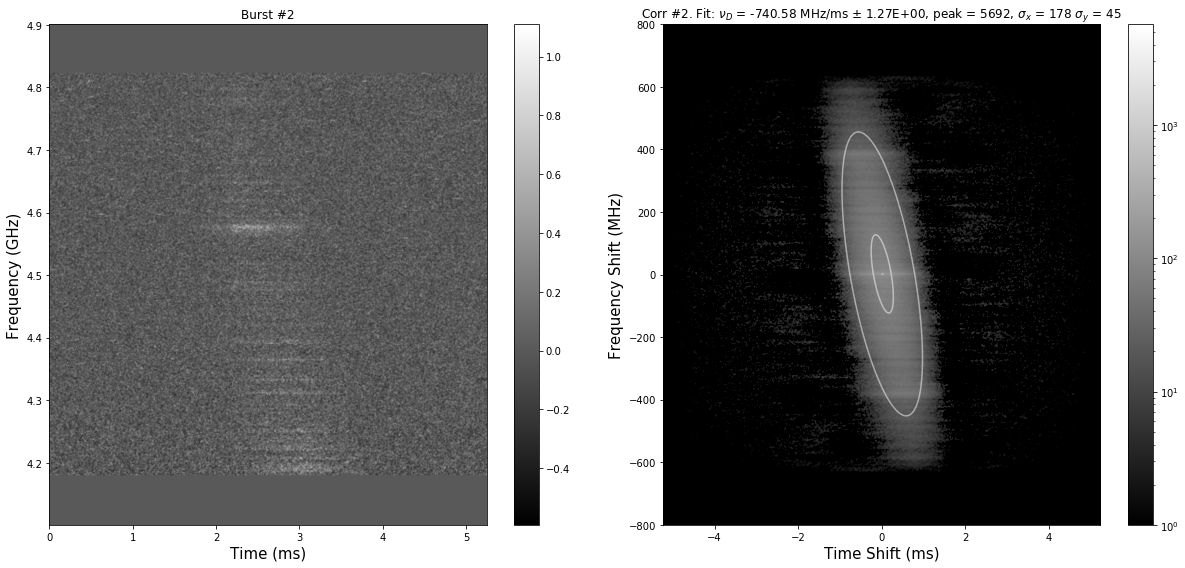

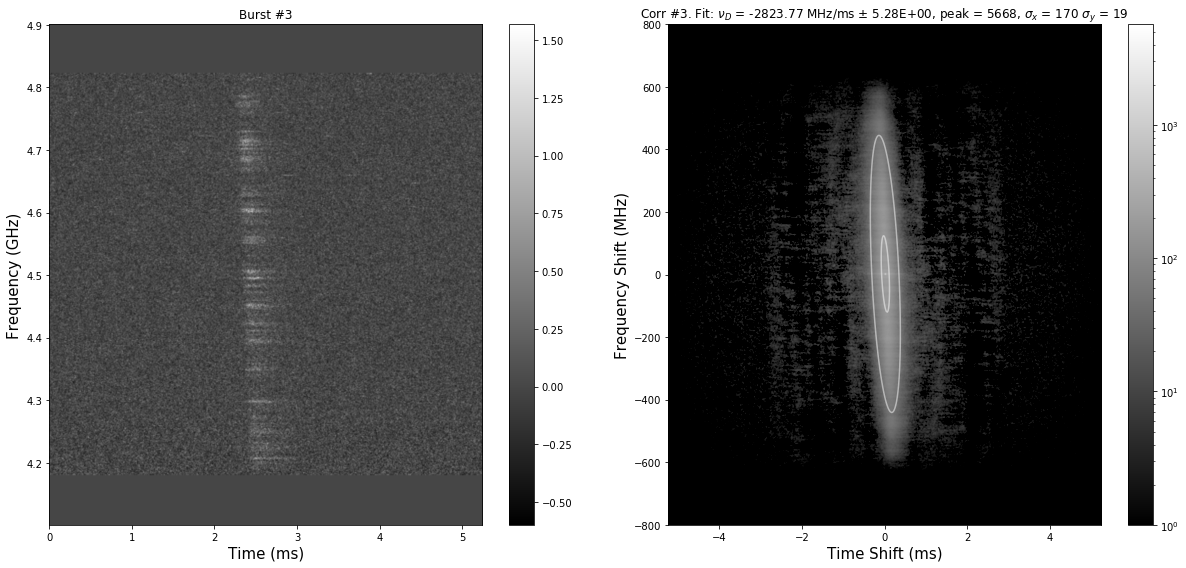

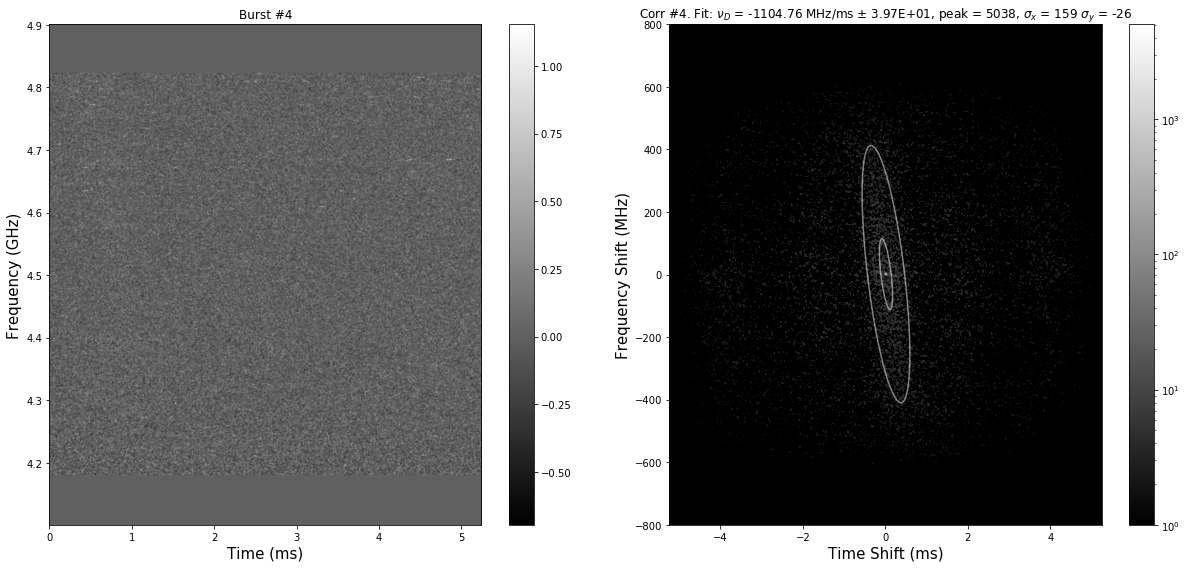

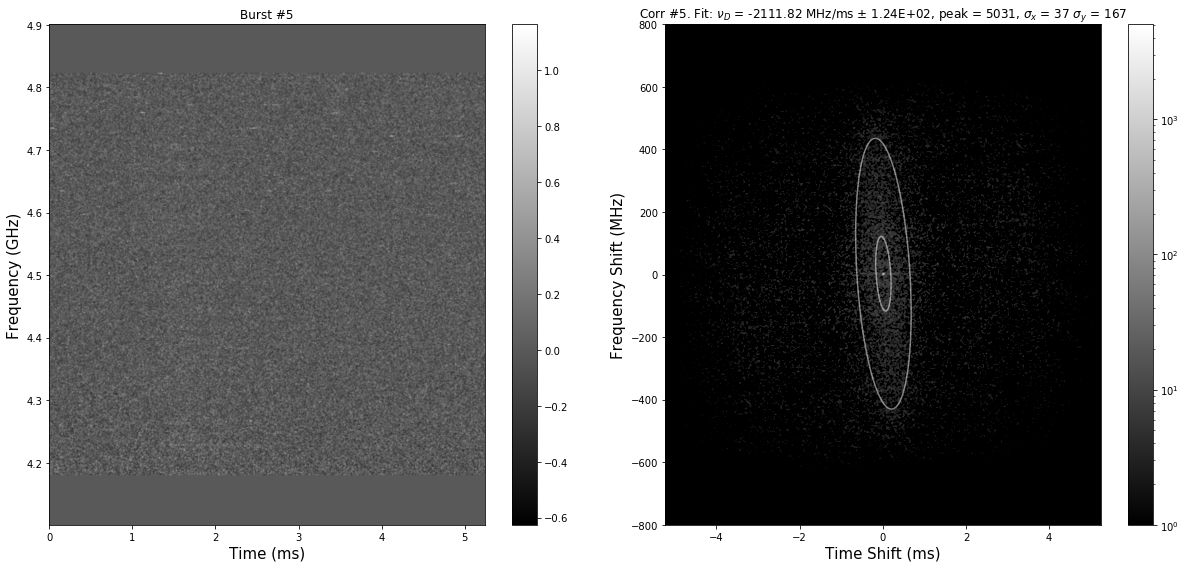

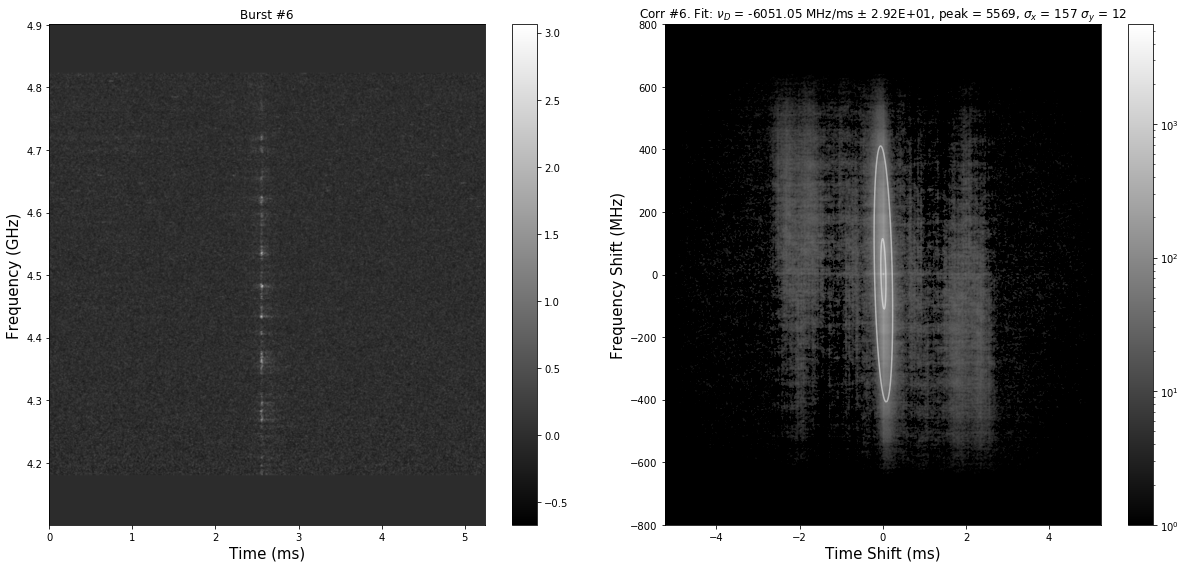

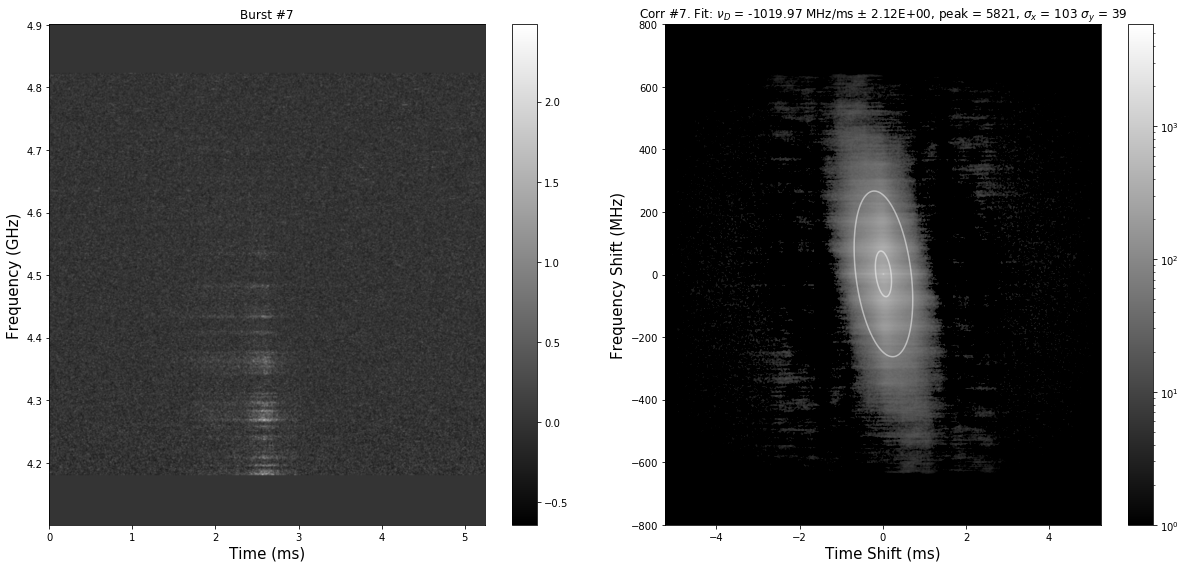

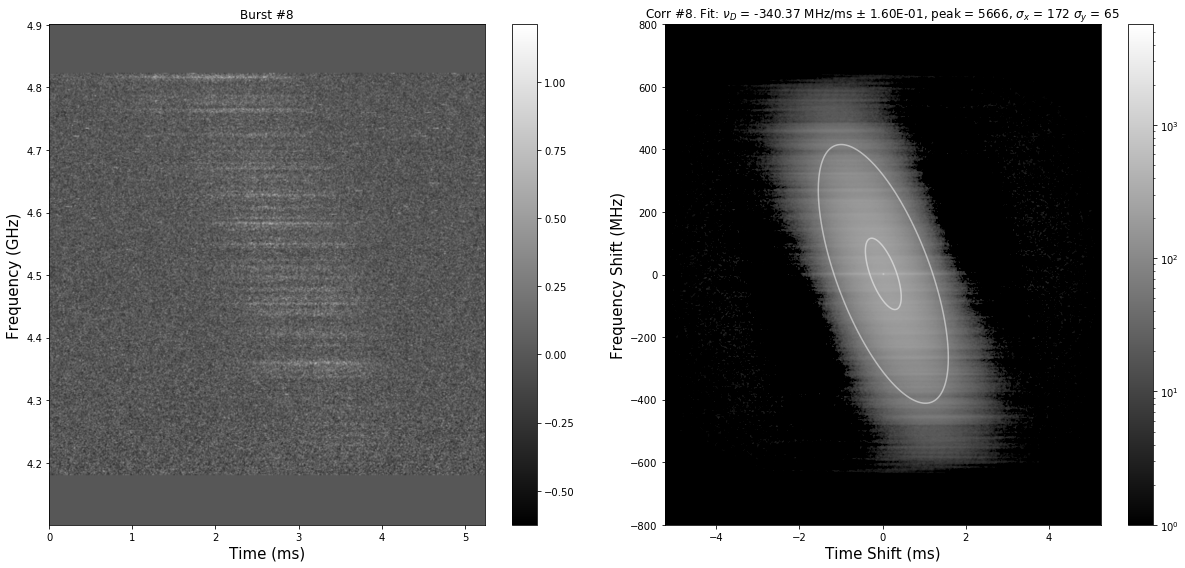

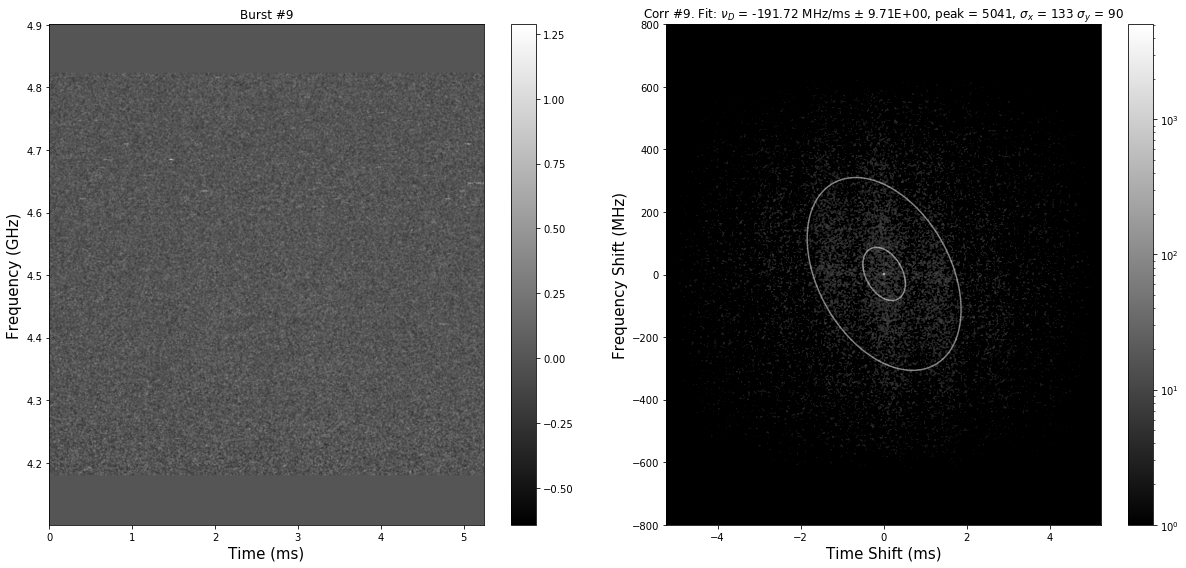

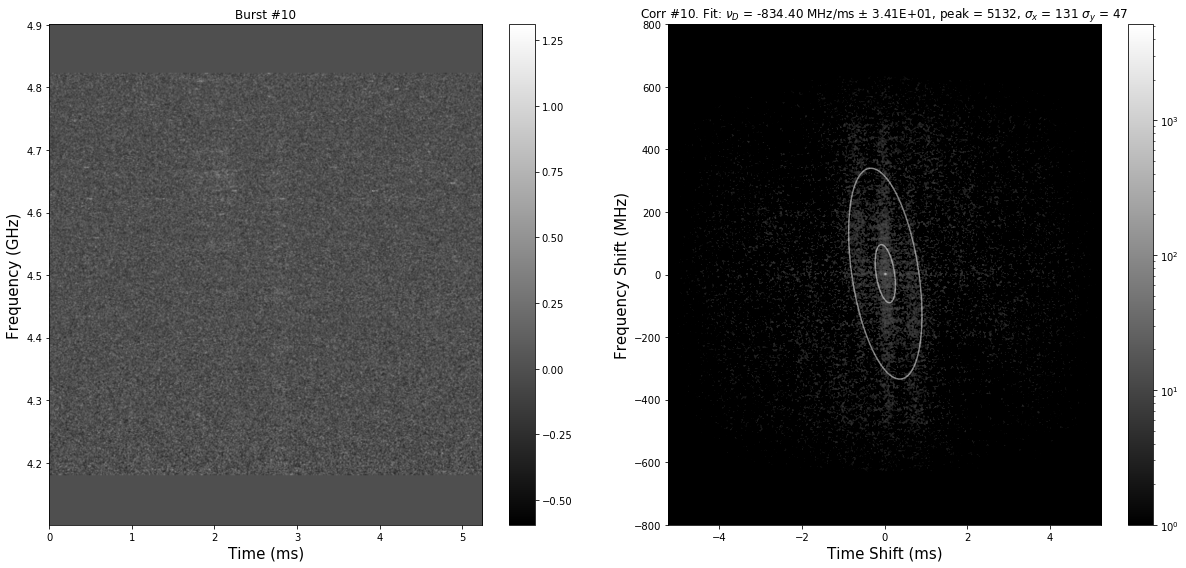

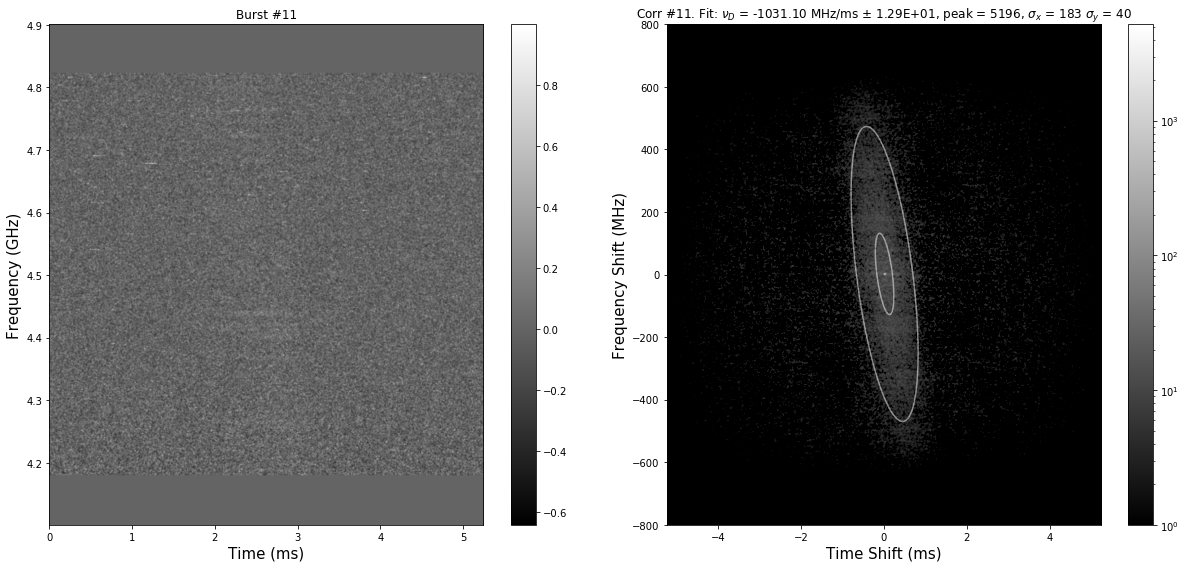

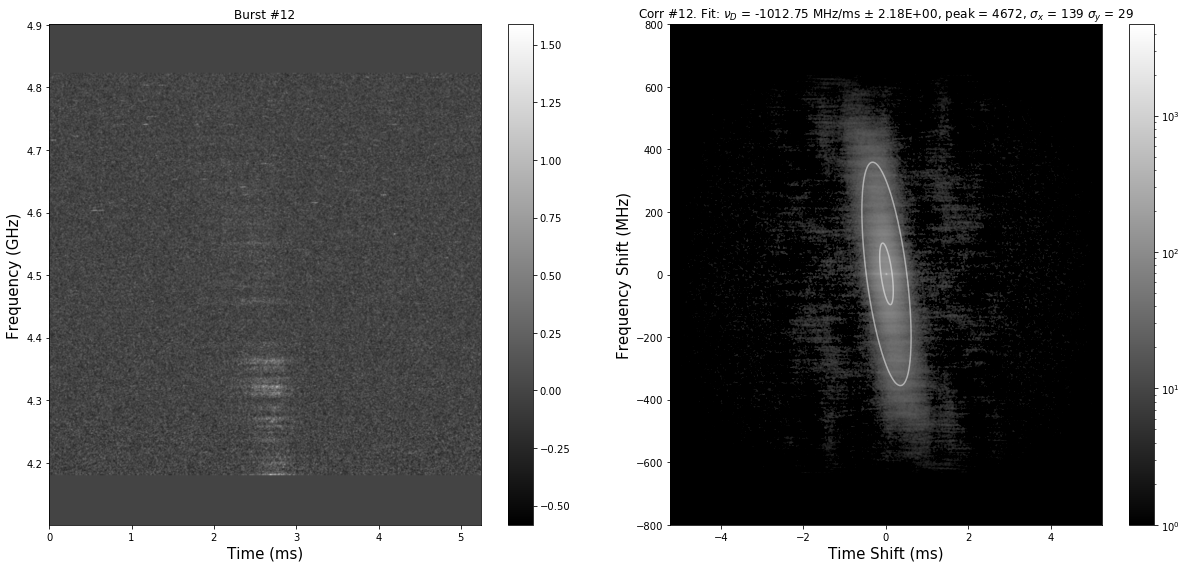

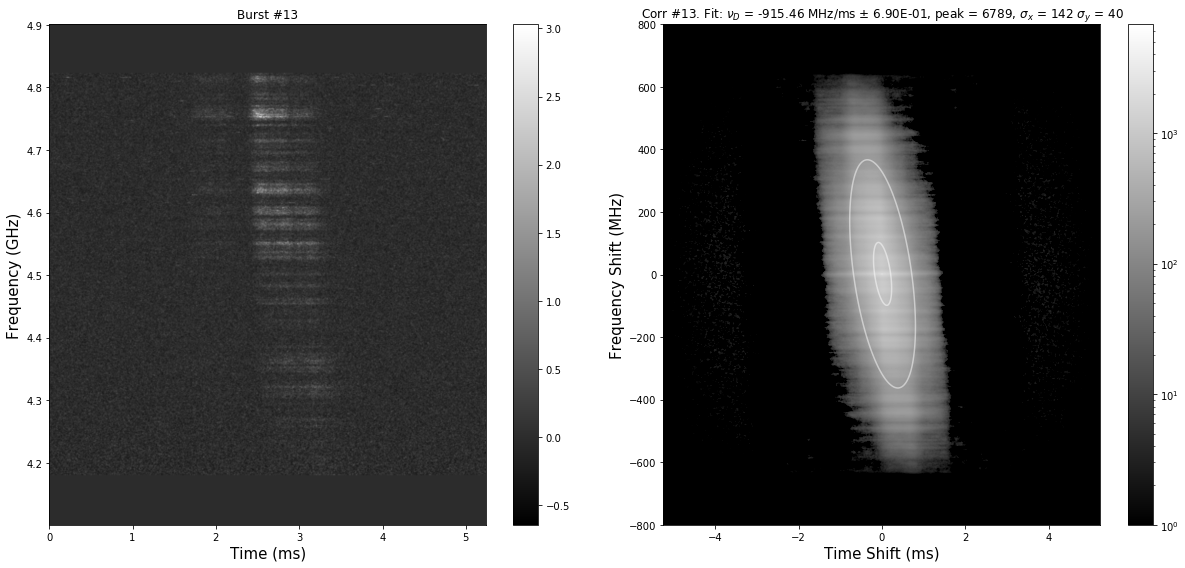

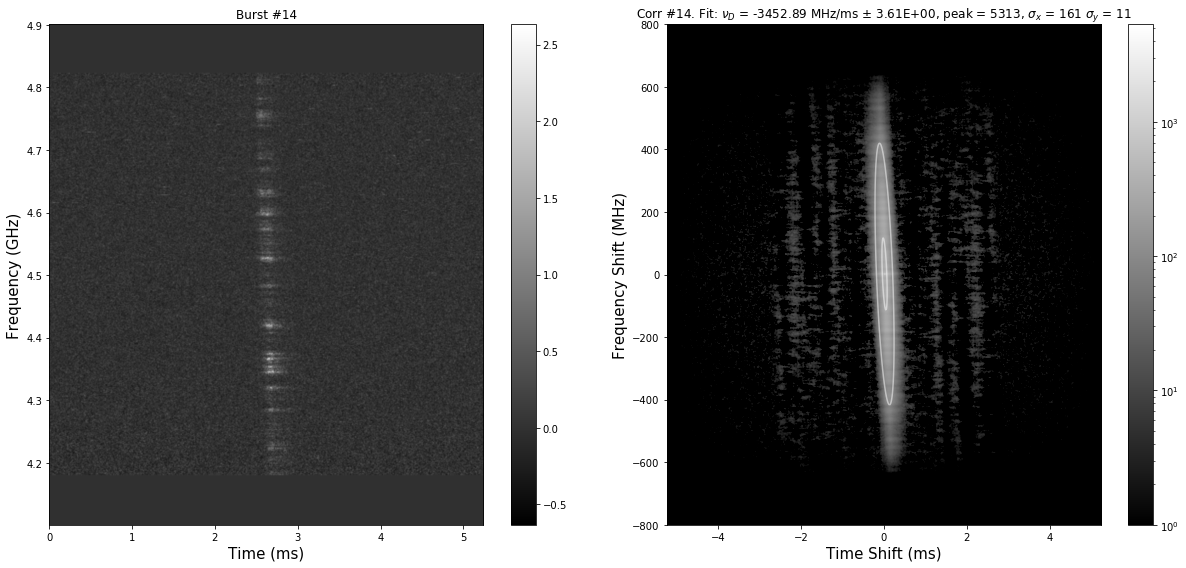

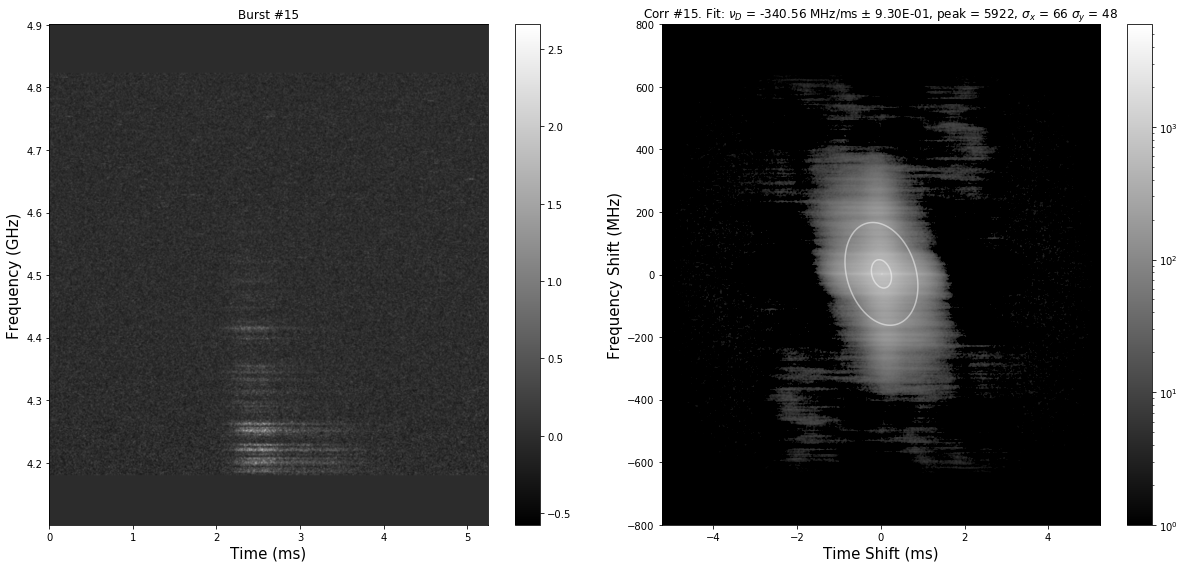

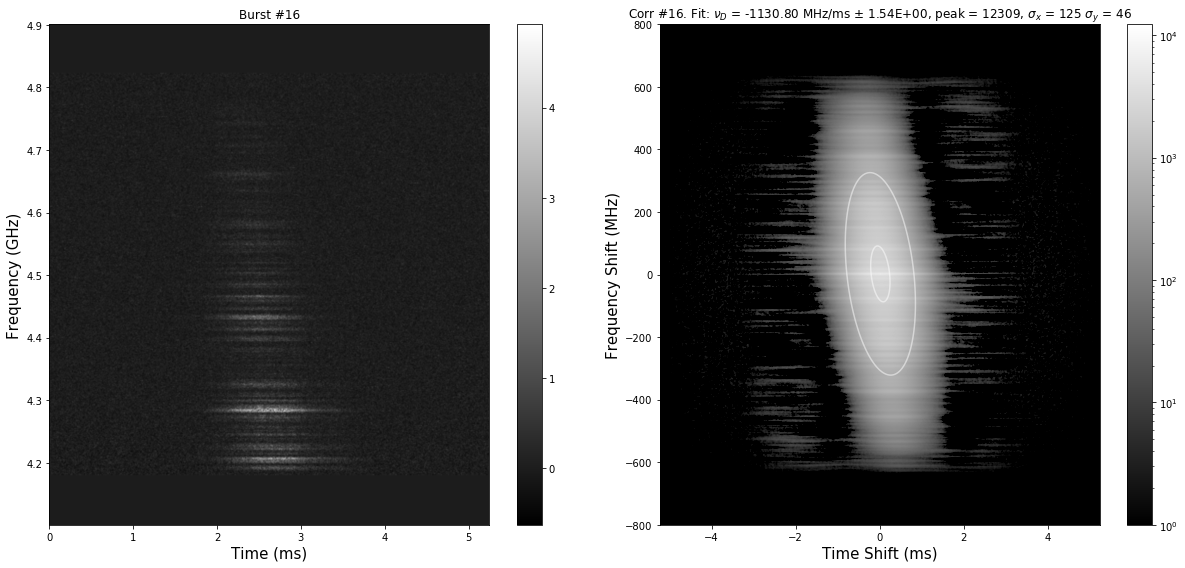

In [16]:
folder = 'data'
outfolder = 'figures'
sigmax_error = []
sigmay_error = []
angle_error  = []
drift_errors  = []
drifts       = []
for burst, filename, edge in tqdm( zip(range(1, len(bursts['filename'])+1), bursts['filename'], bursts['edge']), total=len(bursts['filename']) ):
    print('processing {}'.format(filename))
    if 'gajjar' in filename:
        continue
    if burst > 16:  continue

    #junk, nchan, nbin, I, Q, U, V = np.loadtxt('{}/{}'.format(folder, filename), delimiter=' ', unpack=True)
    #Q, U, V = None, None, None
    
    junk, nchan, nbin, I = [], [], [], []
    with open('{}/{}'.format(folder, filename)) as infile:
        for line in infile:
            junki, nchani, nbini, Ii, _, _, _ = line.split(' ')
            junk.append(junki)
            nchan.append(nchani)
            nbin.append(nbini)
            I.append(Ii)
    junk  = np.array(junk, dtype=float)
    nchan = np.array(nchan, dtype=float)
    nbin  = np.array(nbin, dtype=float)
    I     = np.array(I, dtype=float)
    
    n = len(junk)
    edge = int(edge)
    print("Data loaded")
    
    binmax = int(nbin[n-1])+1
    frequencymax = (int(nchan[n-1])+1)
    intensity = np.zeros((frequencymax, binmax))

    X = np.zeros(binmax)
    Y = np.zeros(frequencymax)

    # what are these?
    tmin = 500 
    tmax = 1500

    #### 1. remove noise
    intensitynoise1 = np.zeros(tmin-1)
    intensitynoise2 = np.zeros(binmax-tmax)
    for i in tqdm(range(frequencymax-50,51,-1), desc='noise removal', disable=True):

        Y[i-1] = 4.15 + (i-1) * 1.5625 # ?

        for j in range(1,tmin) :

            intensitynoise1[j-1] = (I[j-1 + binmax*(frequencymax-i)])/(tmin-1)


        for j in range(tmax+1,binmax+1) :

            intensitynoise2[j-1-tmax] = (I[j-1 + binmax*(frequencymax-i)])/(binmax-tmax)

        a = sum(intensitynoise1)
        b = sum(intensitynoise2)

        for j in range(1,binmax+1) :
            X[j-1] = j-1
            intensity[i-1,j-1] = I[j-1 + binmax*(frequencymax-i)] - (a+b)/2

    #### 2. find autocorrelation 
    burstwindow = intensity[:,edge:edge+frequencymax]
    print("finding auto-correlation...")
    #corr = signal.correlate2d(burstwindow, burstwindow, mode='full')
    #print(corr.shape)
    corr = corrfns.auto_corr2D_viafft(burstwindow)
    
    #### 3. Fit Gaussian to autocorrelation
    print("finding fit...")
    popt, pcov = fitgaussiannlsq(corr)
    perr = np.sqrt(np.diag(pcov))
    x = range(0, 1023); y = range(0, 1023)
    x, y = np.meshgrid(x, y)
    fitmap2 = twoD_Gaussian((x, y), *popt).reshape(1023, 1023)
    print('solution nlsq:', popt)
    print('parameter 1sigma:', perr)
    
    ### 3.5 Compute drift and error
    theta = popt[-1] if popt[3] > popt[4] else popt[-1] - np.pi/2
    print('solver angle:', popt[-1], 'pos angle:', theta)
    slope = np.tan(theta)
    drift = 1.5625/0.01024 * slope # MHz/ms
    drift_error = (1.5625/0.01024) * (perr[-1] * (1/np.cos(theta))**2)
    sigmax_error.append(perr[3])
    sigmay_error.append(perr[4])
    angle_error.append(perr[5])
    drift_errors.append(drift_error)  
    drifts.append(drift)       
    print('drift:', drift)
    print('drift error:', drift_error)
    
    #### 4. Plot
    cmap = plt.get_cmap('gray')
    cmap.set_bad(color = 'k', alpha = 1.) # potentially hides important errors in the data!

    plt.figure(figsize=(17,8))
    plt.subplot(121)
    plt.title("Burst #{}".format(burst))
    burstextents = [0, 
           10.24e-6 * burstwindow.shape[-1] * 1e3, 
           4100.78125 * 1e-3, 
           (4100.78125 + 1.5625*burstwindow.shape[-2]) * 1e-3]
    plt.imshow(burstwindow, cmap=cmap, interpolation='bicubic',aspect='auto', origin="lower", extent=burstextents)
    plt.xlabel("Time (ms)", size=15)
    plt.ylabel("Frequency (GHz)", size=15)
    plt.colorbar()

    plt.subplot(122)
    plt.title("Corr #{}. Fit: $\\nu_D$ = {:.2f} MHz/ms $\pm$ {:.2E}, peak = {:.0f}, $\sigma_x$ = {:.0f} $\sigma_y$ = {:.0f}".format(burst, drift, drift_error, np.max(corr), popt[3], popt[4]))

    corrextents = [-10.24e-6 * (corr.shape[1]/2) * 1e3, 
           10.24e-6 * (corr.shape[1]/2) * 1e3 , 
           (4100.78125 -  (2*4100.78125 + 1.5625*burstwindow.shape[0])/2 )*2, 
           ((4100.78125 + 1.5625*burstwindow.shape[-2]) -  (2*4100.78125 + 1.5625*burstwindow.shape[0])/2 )*2]
    #plt.imshow(corr, cmap=cmap, interpolation='bicubic',aspect='auto', origin="lower") # linear scale
    #plt.clim(0, np.max(corr)/10)
    plt.imshow(corr, cmap=cmap, interpolation='bicubic', aspect='auto', origin="lower", norm=mcolors.LogNorm(vmin=1), extent=corrextents)
    plt.xlabel("Time Shift (ms)", size=15)
    plt.ylabel("Frequency Shift (MHz)", size=15)
    plt.colorbar()
    
    plt.contour(fitmap2, [popt[0]/4, popt[0]*0.9], colors='w', alpha=0.5, origin='lower', extent=corrextents)

    plt.tight_layout()
    plt.savefig('{}/burst_{}_figure.png'.format(outfolder, burst))
    print('saved {}/burst_{}_figure.png'.format(outfolder, burst))



In [27]:
bursts = bursts.head(16)
bursts['sigmax_error'] = sigmax_error 
bursts['sigmay_error'] = sigmay_error 
bursts['angle_error'] = angle_error  
bursts['drift_errors_raw'] = drift_errors  
bursts['drifts_raw'] = drifts       
params = bursts[['name', 'sigmax_error', 'sigmay_error', 'angle_error', 'drift_errors_raw', 'drifts_raw']]
params.to_csv('params_temp.csv')

In [ ]:
cmap = plt.get_cmap('PiYG')
cmap.set_bad(color = 'k', alpha = 1.) # potentially hides important errors in the data!

plt.figure(figsize=(17,8))
plt.subplot(121)
plt.title("Burst #{}".format(burst))
burstextents = [0, 
       10.24e-6 * burstwindow.shape[-1] * 1e3, 
       4100.78125 * 1e-3, 
       (4100.78125 + 1.5625*burstwindow.shape[-2]) * 1e-3]
plt.imshow(burstwindow, cmap=cmap, interpolation='bicubic',aspect='auto', origin="lower", extent=burstextents)
plt.xlabel("Time (ms)", size=15)
plt.ylabel("Frequency (GHz)", size=15)
plt.clim(0, 0.3)
print(np.median(burstwindow))
plt.colorbar()

plt.subplot(122)
plt.title("Corr #{}. Fit: $\\nu_D$ = {:.2f} MHz/ms $\pm$ {:.2E}, peak = {:.0f}, $\sigma_x$ = {:.0f} $\sigma_y$ = {:.0f}".format(burst, drift, drift_error, np.max(corr), popt[3], popt[4]))
# plt.imshow(corr, cmap=cmap, interpolation='bicubic',aspect='auto', origin="lower") # linear scale
# plt.clim(0, np.max(corr)/2)
corrextents = [-10.24e-6 * (corr.shape[1]/2) * 1e3, 
       10.24e-6 * (corr.shape[1]/2) * 1e3 , 
       (4100.78125 -  (2*4100.78125 + 1.5625*burstwindow.shape[0])/2 )*2, 
       ((4100.78125 + 1.5625*burstwindow.shape[-2]) -  (2*4100.78125 + 1.5625*burstwindow.shape[0])/2 )*2]
plt.imshow(corr, cmap=cmap, interpolation='bicubic', aspect='auto', origin="lower", norm=mcolors.LogNorm(vmin=1), extent=corrextents)
plt.xlabel("Time Shift (ms)", size=15)
plt.ylabel("Frequency Shift (MHz)", size=15)
plt.colorbar()

plt.contour(fitmap2, [popt[0]/4, popt[0]*0.9], colors='w', alpha=0.5, origin='lower', extent=corrextents)

plt.tight_layout()

In [ ]:
plt.figure(figsize=(10,10))
cmap = plt.get_cmap('gray')
cmap.set_bad(color = 'k', alpha = 1.)
plt.imshow(corr, cmap=cmap, interpolation='bicubic', aspect='auto', origin="lower", norm=mcolors.LogNorm(vmin=1))
print(np.max(corr), np.min(corr))
# linear cmap
# plt.imshow(corr, cmap=cmap, interpolation='bicubic', aspect='auto', origin="lower")
# plt.clim(0, np.max(corr)/2)

plt.colorbar()


In [ ]:
cmap = "gray"
x = range(0, 1023); y = range(0, 1023)
x, y = np.meshgrid(x, y)
# amplitude, xo, yo, sigma_x, sigma_y, theta
testmap = twoD_Gaussian((x, y), *[1.8e+03, 5.11e+02, 5.11e+02, 1.74e+02, 4.7e+01, 1.425]).reshape(1023, 1023)
popt = [1.8e+03, 5.11e+02, 5.11e+02, 1.74e+02, 4.7e+01, 1.425]

plt.figure(figsize=(10,8))
plt.title("Correlation #{}. Fit: $\\theta$ = {:.2f} rad, peak = {:.0f}, $\sigma_x$ = {} $\sigma_y$ = {}".format(burst, popt[-1], 1000, 1, 1))
print(burstwindow.shape)
burstextents = [0, 
           10.24e-6 * burstwindow.shape[-1] * 1e3, 
           4100.78125 * 1e-3, 
           (4100.78125 + 1.5625*burstwindow.shape[-2]) * 1e-3]

plt.imshow(burstwindow, cmap=cmap, interpolation='bicubic',aspect='auto', origin="lower", extent=burstextents)
plt.xlabel("Time (ms)", size=20)
plt.ylabel("Frequency (GHz)", size=20)
plt.colorbar()


In [ ]:
x = range(0, 1023); y = range(0, 1023)
x, y = np.meshgrid(x, y)
popt = [1,2,3,4,5,6]; burst = 1
fitmap2 = twoD_Gaussian((x, y), *popt).reshape(1023, 1023)
drift = 1; perr = 1
cmap = "gray"
plt.figure(figsize=(10,10))
plt.title("Corr #{}. Fit: $\\nu_D$ = {:.2f} MHz/ms $\pm$ {:.2f}, peak = {:.0f}, $\sigma_x$ = {:.0f} $\sigma_y$ = {:.0f}".format(1,1,1,1,1,1))
# plt.title("TESTCorr #{}. Fit: $\\theta$ = {:.2f}rad, peak = {:.0f}, $\sigma_x$ = {:.0f} $\sigma_y$ = {:.0f}".format(burst, popt[-1], np.max(corr), popt[3], popt[4]))
# corrextents = [-10.24e-6 * corr.shape[1] * 1e3 / 2, 
#            10.24e-6 * corr.shape[1] * 1e3 / 2, 
#            (4100.78125 -  (4100.78125 + 1.5625*corr.shape[0]/2) ) * 1e-3, 
#            (4100.78125 +  (4100.78125 + 1.5625*corr.shape[0]/2) ) * 1e-3]
plt.imshow(fitmap2, cmap=cmap, interpolation='bicubic', aspect='auto', origin="lower", norm=mcolors.LogNorm(vmin=1))#, extent=corrextents)
plt.colorbar()
# plt.contour(fitmap2, [popt[0]/4, popt[0]*0.9], colors='w', alpha=0.5, origin='lower', extent=corrextents)

In [ ]:
corrextents = [-10.24e-6 * (corr.shape[1]/2) * 1e3, 
           10.24e-6 * (corr.shape[1]/2) * 1e3 , 
           (4100.78125 -  (2*4100.78125 + 1.5625*burstwindow.shape[0])/2 )*2, 
           ((4100.78125 + 1.5625*burstwindow.shape[-2]) -  (2*4100.78125 + 1.5625*burstwindow.shape[0])/2 )*2]
corrextents